In [1]:
# Import libraries 
import librosa
import librosa.display
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import IPython.display as ipd  # To play sound in the notebook
import os
import sys
import warnings
# ignore warnings 
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
# DATASET DIRECTORY PATH 
root_directory_path = 'data\RAVDEES'

# LIST TO STORE INDIVIDUAL WAVE FILE PATH FROM DIRECTORY
file_ = []


for root, dirs, files in os.walk(root_directory_path):
    for f in files:
        if os.path.splitext(f)[1] != '.wav':
            continue
        file_path = os.path.join(root, f)
        file_.append(file_path)

###### FILE NAME DESCRIPTION:

In [3]:
file_[0]

'data\\RAVDEES\\Actor_01\\03-01-01-01-01-01-01.wav'

*   Modality (01 = full-AV, 02 = video-only, 03 = audio-only).
*   Vocal channel (01 = speech, 02 = song).

*   Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised).

*   Emotional intensity (01 = normal, 02 = strong). NOTE: There is no strong intensity for the 'neutral' emotion.
*   Statement (01 = "Kids are talking by the door", 02 = "Dogs are sitting by the door").


*   Repetition (01 = 1st repetition, 02 = 2nd repetition).



*   Actor (01 to 24. Odd numbered actors are male, even numbered actors are female).

In [4]:
# FUNCTION TO EXTRACT GENDER FROM FILE NAME
def gender(row):
  '''
  this functions takes input as wav file path and return a speaker gender whether its men or women
  '''
  file_name = row.split('\\')[3]
  gender = []
  part = file_name.split('.')[0].split('-')
  temp = int(part[6])
  if temp % 2 == 0:
    return 'Women'
  else:
    return 'Men'

# FUNCTION TO EXTRACT LABELED EMOTION FROM FILE NAME
def extract_emotion(row):
  '''
  this function takes input as wav file path and returns emotion from listed dictionary
  '''
  emotion_dict = {1 : 'neutral', 2 : 'calm', 3 : 'happy', 4 : 'sad', 5 : 'angry', 6 : 'fearful', 7 : 'disgust', 8 : 'surprised'}
  file_name = row.split('\\')[3]
  part = file_name.split('.')[0].split('-')
  emotion = int(part[2])
  return emotion_dict[emotion]

In [5]:
def path_2_df():
  '''
  this function aggregates a two extract function and returns DataFrme
  '''
  df = pd.DataFrame(file_)
  df.columns = ['path']
  df['Speaker'] = df['path'].apply(gender)
  df['Emotion'] = df['path'].apply(extract_emotion)
  df["Label"] = df["Speaker"] + '_' + df["Emotion"]
  return df

In [6]:
Ravdees_df = path_2_df()
Ravdees_df.head()

,path,Speaker,Emotion,Label
0,data\RAVDEES\Actor_01\03-01-01-01-01-01-01.wav,Men,neutral,Men_neutral
1,data\RAVDEES\Actor_01\03-01-01-01-01-02-01.wav,Men,neutral,Men_neutral
2,data\RAVDEES\Actor_01\03-01-01-01-02-01-01.wav,Men,neutral,Men_neutral
3,data\RAVDEES\Actor_01\03-01-01-01-02-02-01.wav,Men,neutral,Men_neutral
4,data\RAVDEES\Actor_01\03-01-02-01-01-01-01.wav,Men,calm,Men_calm


In [7]:
# save as csv for future usage
Ravdees_df.to_csv('Ravdees_df.csv')

##### RAVDEES DATA EXPLORATION:

##### SHAPE:

In [11]:
Ravdees_df.shape

(2880, 4)

##### EMOTIONS CAPTURED:

Text(0.5, 1.0, 'Sentiment_Diversity')

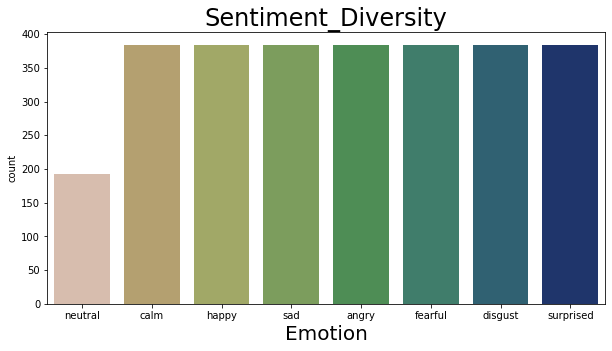

In [15]:
fig, ax = plt.subplots(figsize = ( 10 , 5 ))
sns.countplot(x="Emotion", data=Ravdees_df,palette='gist_earth_r')
ax.set_xlabel( "Emotion" , size = 20 )
ax.set_title( "Sentiment_Diversity" , size = 24 )

Text(0.5, 1.0, 'Sentiment_Diversity')

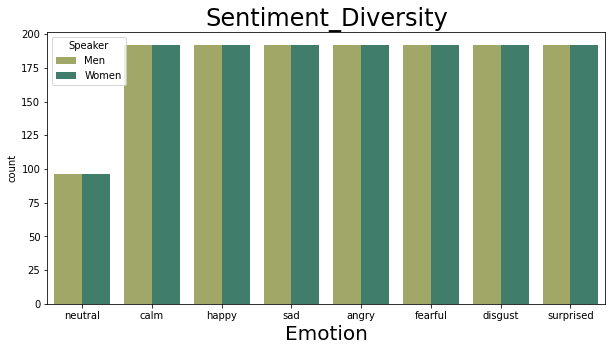

In [17]:
fig, ax = plt.subplots(figsize = ( 10 , 5 ))
sns.countplot(x="Emotion",hue = 'Speaker',data=Ravdees_df,palette='gist_earth_r')
ax.set_xlabel( "Emotion" , size = 20 )
ax.set_title( "Sentiment_Diversity" , size = 24 )

**Feature Extraction:**
  
  Like other Natural Language, Speech also had different characteristics, here we named as features. Features in audio are fells under two categories.
 
  Time Domain Features


*   Zero Crossing Rate
*   Maximum Amplitude

*   Minimum Amplitude





  Frequency Domain Features
*   Pitch

*   Rhythm
*   Melody

Quefrequency Domain


*   MFCC (Mel Frequency Cepstrum Coefficient)

**WavePlot:** is 2 Dimensional plot between Amplitude over a period of time generally in seconds.

Basically sound is continous spectrum of different amplitude over a time. Most cases these points are meant to discretised by some sampling rate like 44khz or 22khz. It means from spectrum 44000 samples are collected per second. You can got at this time, yes we are gonna deal with huge amount of data.


we randomly handpicked some audio files from each category and compare how different emotions varies over time.

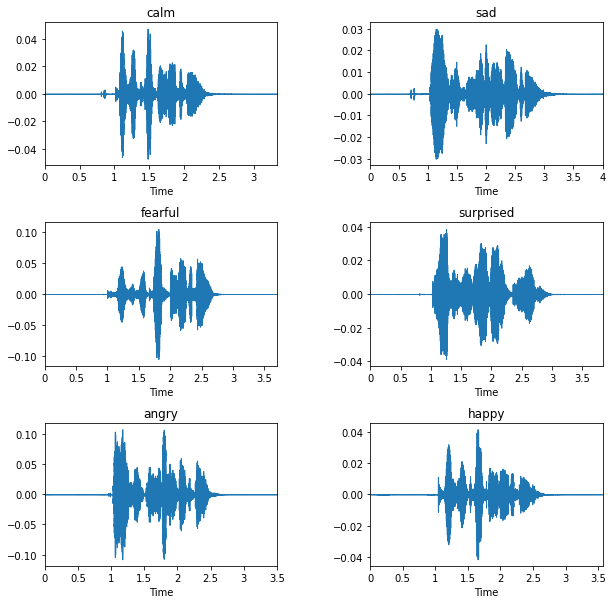

In [19]:
# Pick a calm track
calm = Ravdees_df['path'][1]

# Pick a sad track
sad = Ravdees_df['path'][11]

# Pick a fearful track
fearful = Ravdees_df['path'][25]

# Pick a surprised track
surprised = Ravdees_df['path'][47]

# Pick a angry track
angry = Ravdees_df['path'][30]

# Pick a happy track
happy = Ravdees_df['path'][21]

file_path_each_labels = [calm, sad, fearful, surprised, angry, happy]
title_ = ['calm', 'sad', 'fearful', 'surprised', 'angry', 'happy']


fig = plt.figure(figsize=(10,10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, file_paths in enumerate(file_path_each_labels):
  fig.add_subplot(3, 2, i+1)
  plt.title(title_[i])
  data, sample_rate = librosa.load(file_paths)

  librosa.display.waveplot(data, sr= sample_rate)

Since not an expert in acoustics, I can classify, the above all plots are not same. Each waveform is unique in nature. 

**Calm** oscillates in constant variance, **sad** replicates like calm but less in intensity, **fear** reaches maximum intensity, **surprise** drops in between, **anger** starts and end with heavy peaks and finally **happiness** contains periodical spikes.

So there is an pattern in every emotions, if we learn those patterns we can sense out of it.

**Intensities between Genders:**

Lets diverse our objective by understanding emotions between genders.

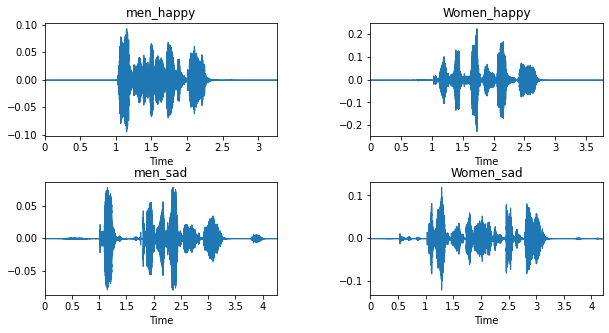

In [29]:
# Pick a men_happy track
men_happy = Ravdees_df['path'][2775]

# Pick a Women_happy track
Women_happy = Ravdees_df['path'][2837]

# Pick a men_sad track
men_sad = Ravdees_df['path'][2784]

# Pick a Women_sad track
Women_sad = Ravdees_df['path'][2846]

file_path_gender_labels = [men_happy, Women_happy, men_sad, Women_sad]
title = ['men_happy', 'Women_happy', 'men_sad', 'Women_sad']


fig = plt.figure(figsize=(10,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, file_paths in enumerate(file_path_gender_labels):
  fig.add_subplot(2, 2, i+1)
  plt.title(title[i])
  data, sample_rate = librosa.load(file_paths)

  librosa.display.waveplot(data, sr= sample_rate)

From above patterns, women's utterance reaches maximum intensities compare to men. But Intensity variation across time is more converged for womens as compare to mens.

**SPECTROGRAM:**
  
  Spectrogram is another form of graphical representation to visualize audio signals. It represents Strength or Ampplitute over a time t at various frequencies.
  
  It calculated by "STFT" Short Term Fourier Transform to represents signal in Time-Frequency domain by applying Discrete Fourier Transform over short overlapping window.

  Lets take same examples from above and visualize the strength of different emotions in Time-Frequency domain.

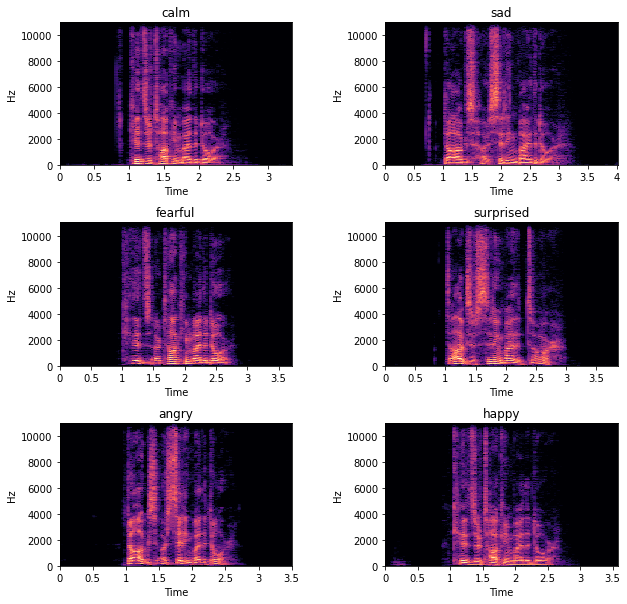

In [30]:
fig = plt.figure(figsize=(10,10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, file_paths in enumerate(file_path_each_labels):
  fig.add_subplot(3, 2, i+1)
  plt.title(title_[i])
  data, sample_rate = librosa.load(file_paths)
  X = librosa.stft(data)
  Xdb = librosa.amplitude_to_db(abs(X))
  librosa.display.specshow(Xdb, sr=sample_rate, x_axis='time', y_axis='hz')

**Spectrogram between Men and Women:**

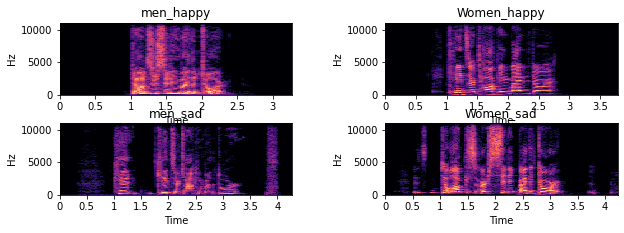

In [31]:
fig = plt.figure(figsize=(10,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, file_paths in enumerate(file_path_gender_labels):
  fig.add_subplot(3, 2, i+1)
  plt.title(title[i])
  data, sample_rate = librosa.load(file_paths)
  X = librosa.stft(data)
  Xdb = librosa.amplitude_to_db(abs(X))
  librosa.display.specshow(Xdb, sr=sample_rate, x_axis='time', y_axis='hz')

##### MEL FREQUENCY CEPSTRAL CO-EFFICIENT:

Mel scale is a scale that relates the perceived frequency of tone to actual measured frequency.

  Mel scale = Perceived frequency by human / Actual measured frequency.

  Lets look how emotions displayed in mel cepstrum

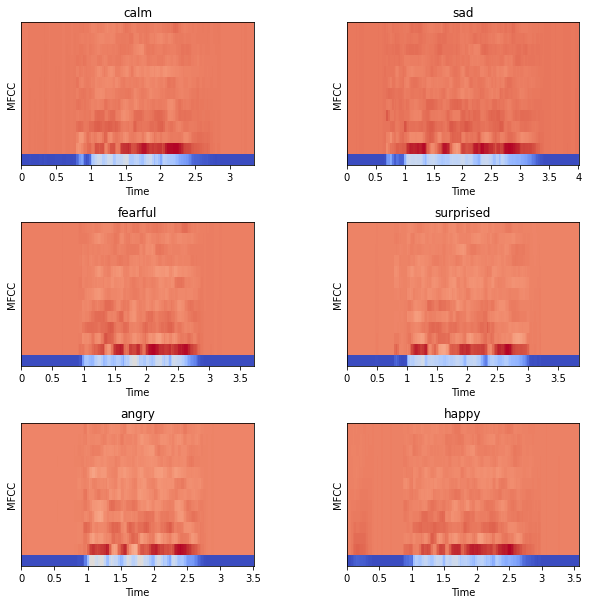

In [32]:
fig = plt.figure(figsize=(10,10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, file_paths in enumerate(file_path_each_labels):
  fig.add_subplot(3, 2, i+1)
  plt.title(title_[i])
  data, sample_rate = librosa.load(file_paths)
  mfcc = librosa.feature.mfcc(y=data, sr=sample_rate,n_mfcc=13)
  librosa.display.specshow(mfcc, x_axis='time')
  plt.ylabel('MFCC')

Above MFCC plot for different emotions varies differently.

By closely looking throgh above plot, it has 13 frequency bands, in which log scaled frequencies plotted over the time. 

Each band has 132 variables, we can take mean along the each band. we will end up in (13,) shaped square matirx for each audio input.

##### FEATURE EXTRACTION RAVDEES DTASET:

**EXTRACT MFCC:**

In [18]:
def mfcc(row):
  '''
  function returns 13 dimensional MFCC vector for each wav file
  '''
  data, sample_rate = librosa.load(row)
  mfcc = librosa.feature.mfcc(y=data, sr=sample_rate,n_mfcc=13)
  mfccs_processed = np.mean(mfcc.T,axis=0)
  return mfccs_processed

In [40]:
Ravdees_df['mfcc'] = Ravdees_df['path'].apply(mfcc)

In [42]:
mfcc_df = Ravdees_df.mfcc.apply(pd.Series)
mfcc_df.columns = [f'mfcc_{i}' for i in range(0,13)]
mfcc_df.head()

,mfcc_0,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,mfcc_10,mfcc_11,mfcc_12
0,-697.984192,55.228489,0.323863,12.775377,7.396147,0.866224,-3.550276,-2.828331,-11.305532,-2.524927,0.496104,-2.722926,1.645800
1,-693.069763,55.734570,-1.919739,16.408995,8.449355,0.220736,-1.738342,-4.931291,-11.981821,-0.993780,0.494107,-2.296898,0.678700
2,-691.770142,58.350647,-0.165160,13.952125,5.053323,1.489326,-2.397429,-5.059065,-10.638003,-3.344197,0.264550,-2.529107,1.548612
3,-685.237915,56.236694,2.453112,13.566656,6.701949,3.341493,-1.895052,-6.673817,-10.671633,-2.946320,0.895644,-1.203600,0.246569
4,-727.317932,62.764400,2.751275,15.473256,7.763115,2.330714,-3.641682,-3.367344,-10.113077,-4.470085,0.639894,-2.745656,0.198219


In [48]:
# save the features for future usages
mfcc_df.to_csv('ravdees_mfcc_feature.csv')

**AUDIO CHROMOGRAMS:**

chromagram closely relates to the twelve different pitch classes.

One main property of chroma features is that they capture harmonic and melodic characteristics of music.


Chroma features are an interesting and powerful representation for music audio in which the entire spectrum is projected onto 12 bins representing the 12 distinct semitones (or chroma) of the musical octave.

Chroma is a 12-element vector that measures energy from the sound pitch.

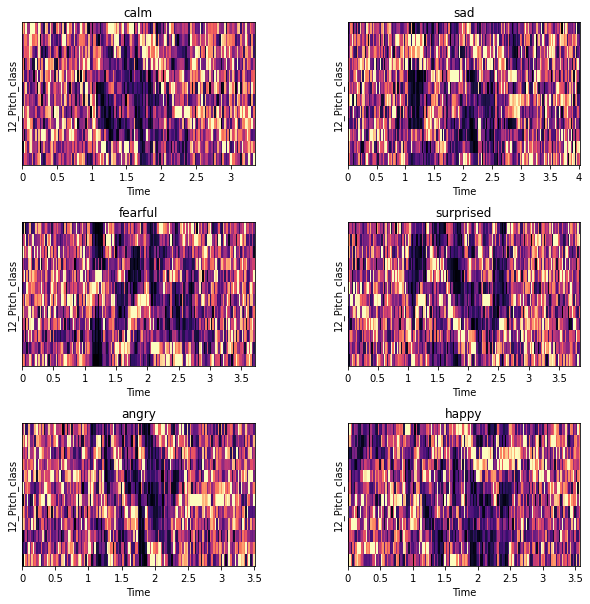

In [49]:
fig = plt.figure(figsize=(10,10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, file_paths in enumerate(file_path_each_labels):
  fig.add_subplot(3, 2, i+1)
  plt.title(title_[i])
  data, sample_rate = librosa.load(file_paths)
  X = librosa.stft(data)
  chroma = librosa.feature.chroma_stft(S=X, sr=sample_rate)
  librosa.display.specshow(chroma, x_axis='time')
  plt.ylabel('12_Pitch_class')

In [23]:
def chroma_extraction(row):
  '''
  function returns 12 dimensional chroma fetures for each wav file
  '''
  data, sample_rate = librosa.load(row)
  stft = np.abs(librosa.stft(data))
  chroma = librosa.feature.chroma_stft(S=stft, sr=sample_rate)
  mfccs_processed = np.mean(chroma.T,axis=0)
  return mfccs_processed

In [51]:
Ravdees_df['chroma'] = Ravdees_df['path'].apply(chroma_extraction)

In [52]:
chroma_df = Ravdees_df.chroma.apply(pd.Series)
chroma_df.columns = [f'chroma_{i}' for i in range(0,12)]
chroma_df.head()

,chroma_0,chroma_1,chroma_2,chroma_3,chroma_4,chroma_5,chroma_6,chroma_7,chroma_8,chroma_9,chroma_10,chroma_11
0,0.750464,0.789711,0.777893,0.782119,0.739672,0.680501,0.683999,0.728767,0.755843,0.746300,0.744283,0.722983
1,0.745426,0.780563,0.761836,0.730627,0.706191,0.670700,0.688251,0.725533,0.750582,0.741526,0.739967,0.722161
2,0.769347,0.796819,0.792132,0.799599,0.758837,0.680383,0.675742,0.722138,0.766105,0.754845,0.704651,0.713902
3,0.771895,0.747749,0.743485,0.767090,0.736074,0.704557,0.696775,0.758889,0.743286,0.708235,0.719849,0.735220
4,0.693920,0.755944,0.787223,0.759046,0.700144,0.684185,0.670651,0.707704,0.717103,0.737612,0.769464,0.702859


In [53]:
chroma_df.to_csv('chroma_feature.csv')

**SPECTRAL CONSTRAST:**

Difference between peak and valleys.

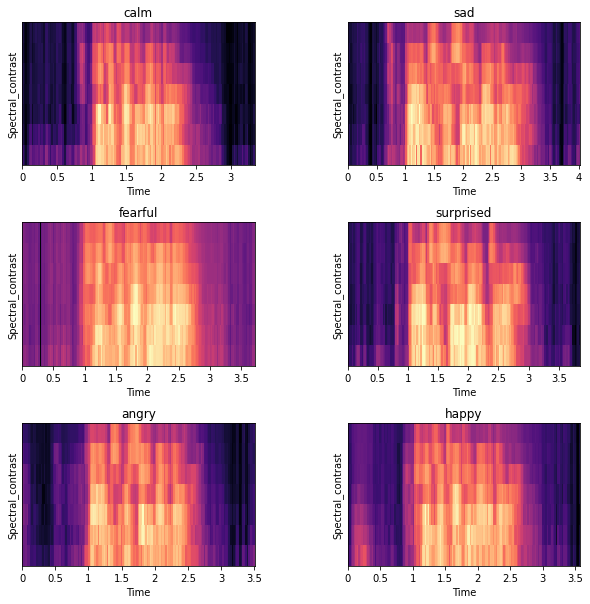

In [54]:
fig = plt.figure(figsize=(10,10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, file_paths in enumerate(file_path_each_labels):
  fig.add_subplot(3, 2, i+1)
  plt.title(title_[i])
  data, sample_rate = librosa.load(file_paths)
  stft = librosa.stft(data)
  spectral = librosa.feature.spectral_contrast(S=stft, sr=sample_rate)
  librosa.display.specshow(spectral, x_axis='time')
  plt.ylabel('Spectral_contrast')

In [31]:
def spectral_contrast_extraction(row):
  '''
  function returns the 7 dimensioanal spectral contrast vector for every wav files
  ''' 
  data, sample_rate = librosa.load(row)
  stft = np.abs(librosa.stft(data))
  spectral_contrast = librosa.feature.spectral_contrast(S=stft, sr=sample_rate)
  spectral_contrast_processed = np.mean(spectral_contrast.T,axis=0)
  return spectral_contrast_processed

In [56]:
Ravdees_df['Spectral Contrast'] = Ravdees_df['path'].apply(spectral_contrast_extraction)

In [57]:
spectral_contrast_df = Ravdees_df['Spectral Contrast'].apply(pd.Series)
spectral_contrast_df.columns = [f'spectral_contrast_{i}' for i in range(0,7)]
spectral_contrast_df.head()

,spectral_contrast_0,spectral_contrast_1,spectral_contrast_2,spectral_contrast_3,spectral_contrast_4,spectral_contrast_5,spectral_contrast_6
0,19.170998,11.228536,14.938287,14.187339,14.899156,16.857357,29.403947
1,19.703677,12.061533,15.659183,14.883159,15.174847,16.912811,28.869441
2,18.818881,12.208414,14.876291,14.282521,15.448914,16.767068,29.213471
3,20.481934,11.763805,15.675734,15.455351,15.378251,16.154742,28.362977
4,18.478177,11.246410,15.137288,14.289477,15.609332,16.297521,28.978391


In [59]:
spectral_contrast_df.to_csv('ravdees_spectral_features.csv')

##### COMPILING EXTRACTED FEATURES

In [56]:
# CONCATENATE ALL FEATURES 
Ravdees_df1 = pd.concat([pd.read_csv('ravdees_mfcc_feature.csv'),
                         pd.read_csv('chroma_feature.csv'),
                         pd.read_csv('ravdees_spectral_features.csv')],
                                                                       axis=1)
# some cleaning steps
Ravdees_df1.drop(['Unnamed: 0'], axis = 1,inplace=True)
Ravdees_df2 = pd.concat([Ravdees_df, Ravdees_df1],axis=1)
Ravdees_df2.drop(['path'], axis = 1,inplace=True)
Ravdees_df2.head()

,Speaker,Emotion,Label,mfcc_0,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,...,chroma_9,chroma_10,chroma_11,spectral_contrast_0,spectral_contrast_1,spectral_contrast_2,spectral_contrast_3,spectral_contrast_4,spectral_contrast_5,spectral_contrast_6
0,Men,neutral,Men_neutral,-697.98420,55.228490,0.323863,12.775377,7.396147,0.866224,-3.550276,...,0.746300,0.744283,0.722983,19.170998,11.228536,14.938287,14.187339,14.899156,16.857357,29.403947
1,Men,neutral,Men_neutral,-693.06976,55.734570,-1.919739,16.408995,8.449355,0.220736,-1.738342,...,0.741526,0.739967,0.722161,19.703677,12.061533,15.659183,14.883159,15.174847,16.912811,28.869441
2,Men,neutral,Men_neutral,-691.77014,58.350647,-0.165160,13.952125,5.053323,1.489326,-2.397429,...,0.754845,0.704650,0.713902,18.818881,12.208414,14.876291,14.282521,15.448914,16.767068,29.213471
3,Men,neutral,Men_neutral,-685.23790,56.236694,2.453112,13.566656,6.701949,3.341493,-1.895052,...,0.708235,0.719849,0.735221,20.481934,11.763805,15.675734,15.455351,15.378251,16.154742,28.362977
4,Men,calm,Men_calm,-727.31793,62.764400,2.751275,15.473256,7.763115,2.330714,-3.641682,...,0.737612,0.769464,0.702859,18.478177,11.246410,15.137288,14.289477,15.609332,16.297521,28.978391


In [64]:
# final RAVDEES dataset shape
Ravdees_df2.shape

(2880, 35)

We initially started with 4 features but end up by 36 features, lets follow the same procedures in CREMA Datasets too.

##### CREMA D DATASET:

CREMA D is an open source pre annotated datset as same as like Ravdees dataset. But it contains wide varities of accents and age categorises from 10 to 70 in both genders.

In [3]:
# DATASET DIRECTORY PATH 
root_directory_2 = 'data/CREMA-D/AudioWAV'

In [4]:
file_2 = []
for root, dirs, files in os.walk(root_directory_2):
    for f in files:
        if os.path.splitext(f)[1] != '.wav':
            continue
        file_path = os.path.join(root, f)
        file_2.append(file_path)

In [7]:
file_2[0]

'data/CREMA-D/AudioWAV\\1001_DFA_ANG_XX.wav'

In [13]:
def extract_emotion_2(row):
  emotion_dict = {'ANG' : 'angry', 'DIS' : 'disgust', 'FEA' : 'fearful', 'HAP':'happy', 
                  'NEU' : 'neutral', 'SAD' : 'sad'}
  file_name = row.split('\\')[1]
  part = file_name.split('.')[0].split('_')
  emotion = part[2]
  return emotion_dict[emotion]

def extract_gender_2(row):
  
  file_name = row.split('\\')[1]
  part = file_name.split('.')[0].split('_')
  emotion = int(part[0])
  '''
  Since Audio file name not had distint identification for gender. Cheyney Computer Science github account has video file demographic description. 
  Here I hard coded the gender tags.
  '''
  female_tag = [1002, 1003, 1004,1006, 1008, 1009, 1010, 1012, 1013, 1018, 1020, 1021,1024, 
                1025, 1028, 1029, 1030, 1031,1037,1043,1046,1047,1049,1052, 1053, 1054, 1055,
                1056, 1058, 1060, 1061, 1063,1072, 1073, 1074, 1075, 1076, 1078, 1079, 1082,1084,
                1089,1091]

  if emotion in female_tag:
    return 'Women'
  
  else:
    return 'Men'

In [14]:
def Path_2_df():
  df = pd.DataFrame(file_2)
  df.columns = ['path']
  df['Emotion'] = df['path'].apply(extract_emotion_2)
  df['Speaker'] = df['path'].apply(extract_gender_2)
  df["Label"]   = df["Speaker"] + '_' + df["Emotion"]
  return df

In [25]:
Crema_df = Path_2_df()
Crema_df.head()

,path,Emotion,Speaker,Label
0,data/CREMA-D/AudioWAV\1001_DFA_ANG_XX.wav,angry,Men,Men_angry
1,data/CREMA-D/AudioWAV\1001_DFA_DIS_XX.wav,disgust,Men,Men_disgust
2,data/CREMA-D/AudioWAV\1001_DFA_FEA_XX.wav,fearful,Men,Men_fearful
3,data/CREMA-D/AudioWAV\1001_DFA_HAP_XX.wav,happy,Men,Men_happy
4,data/CREMA-D/AudioWAV\1001_DFA_NEU_XX.wav,neutral,Men,Men_neutral


In [16]:
# store dataset for future usage
Crema_df.to_csv('crema_df.csv')

##### EXTRACT MFCC:

In [19]:
Crema_df['mfcc'] = Crema_df['path'].apply(mfcc)

In [26]:
Crema_mfcc_df = Crema_df['mfcc'].apply(pd.Series)
Crema_mfcc_df.columns = [f'mfcc_{i}' for i in range(0,13)]
Crema_mfcc_df.head()

KeyError: 'mfcc'

In [21]:
Crema_df.to_csv('crema_mfcc_features.csv')

##### CHROMAGRAPHIC FEATURE:

In [27]:
Crema_df['chroma'] = Crema_df['path'].apply(chroma_extraction)

In [29]:
Crema_chroma_df = Crema_df['chroma'].apply(pd.Series)
Crema_chroma_df.columns = [f'chroma_{i}' for i in range(0,12)]
Crema_chroma_df.to_csv('crema_chroma_features.csv')
Crema_chroma_df.head()

,chroma_0,chroma_1,chroma_2,chroma_3,chroma_4,chroma_5,chroma_6,chroma_7,chroma_8,chroma_9,chroma_10,chroma_11
0,0.651054,0.691245,0.680642,0.674037,0.665562,0.569879,0.566638,0.622136,0.653787,0.756518,0.837655,0.743894
1,0.710654,0.736296,0.652508,0.672225,0.682468,0.609513,0.576111,0.611773,0.686799,0.806275,0.874256,0.760415
2,0.617550,0.665371,0.646149,0.647305,0.610987,0.588308,0.582090,0.660170,0.683263,0.789435,0.838294,0.665211
3,0.641550,0.650955,0.670518,0.680387,0.664718,0.647278,0.569328,0.619367,0.672951,0.814238,0.804732,0.670106
4,0.703783,0.687631,0.670902,0.672387,0.644441,0.592439,0.604042,0.641489,0.681029,0.755907,0.825707,0.770371


##### SPECTRAL CONTRAST:

In [32]:
Crema_df['spectral_contrast'] = Crema_df['path'].apply(spectral_contrast_extraction)

In [33]:
Crema_spec_df = Crema_df['spectral_contrast'].apply(pd.Series)
Crema_spec_df.columns = [f'spectral_contrast_{i}' for i in range(0,7)]
Crema_spec_df.to_csv('Crema_spec_features.csv')
Crema_spec_df.head()

,spectral_contrast_0,spectral_contrast_1,spectral_contrast_2,spectral_contrast_3,spectral_contrast_4,spectral_contrast_5,spectral_contrast_6
0,20.659908,13.837985,17.602145,16.122507,19.263118,18.394033,64.265911
1,19.174293,13.283377,16.043605,14.836000,18.155272,17.155977,63.997633
2,20.422820,15.250456,17.077452,15.780375,18.835733,17.277737,60.300004
3,19.758422,14.592992,17.149370,15.582527,19.180098,17.765861,61.524320
4,18.518718,13.345817,17.009599,15.239163,18.573577,18.447696,62.601601


##### AGGREGATING FEATURES:

In [36]:
Crema_df1 = pd.concat([pd.read_csv('crema_mfcc_features.csv'),
              pd.read_csv('crema_chroma_features.csv'),
              pd.read_csv('Crema_spec_features.csv')],axis=1)

Crema_df1.drop(['Unnamed: 0'], axis = 1,inplace=True)

Crema_df2 = pd.concat([Crema_df,Crema_df1],axis=1)

Crema_df2.drop(['path','chroma','spectral_contrast'], axis = 1,inplace=True)

Crema_df2.head()

,Emotion,Speaker,Label,mfcc_0,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,...,chroma_9,chroma_10,chroma_11,spectral_contrast_0,spectral_contrast_1,spectral_contrast_2,spectral_contrast_3,spectral_contrast_4,spectral_contrast_5,spectral_contrast_6
0,angry,Men,Men_angry,-342.14430,121.517204,-10.368269,39.999348,-2.365358,13.843034,-18.595284,...,0.756518,0.837655,0.743894,20.659908,13.837985,17.602145,16.122507,19.263118,18.394033,64.265911
1,disgust,Men,Men_disgust,-388.62020,134.612870,-18.382833,53.543390,-0.728348,22.805240,-23.739586,...,0.806275,0.874256,0.760415,19.174293,13.283377,16.043605,14.836000,18.155272,17.155977,63.997633
2,fearful,Men,Men_fearful,-352.46588,116.188560,-3.568364,33.200270,5.417990,11.300583,-16.807432,...,0.789435,0.838294,0.665211,20.422820,15.250456,17.077452,15.780375,18.835733,17.277737,60.300004
3,happy,Men,Men_happy,-337.83783,120.653694,-13.208455,40.086323,4.274967,10.137274,-21.351772,...,0.814238,0.804732,0.670106,19.758422,14.592992,17.149370,15.582527,19.180098,17.765861,61.524320
4,neutral,Men,Men_neutral,-368.24304,125.001070,-5.113783,39.821598,6.775904,12.440155,-12.919507,...,0.755907,0.825707,0.770371,18.518718,13.345817,17.009599,15.239163,18.573577,18.447696,62.601601


In [37]:
Crema_df2.shape

(7442, 35)

##### FINAL DATASET:

In [57]:
Audio_df = pd.concat([Ravdees_df2,Crema_df2 ],axis=0)

In [58]:
Audio_df.shape

(10322, 35)

Text(0.5, 1.0, 'Sentiment_Diversity')

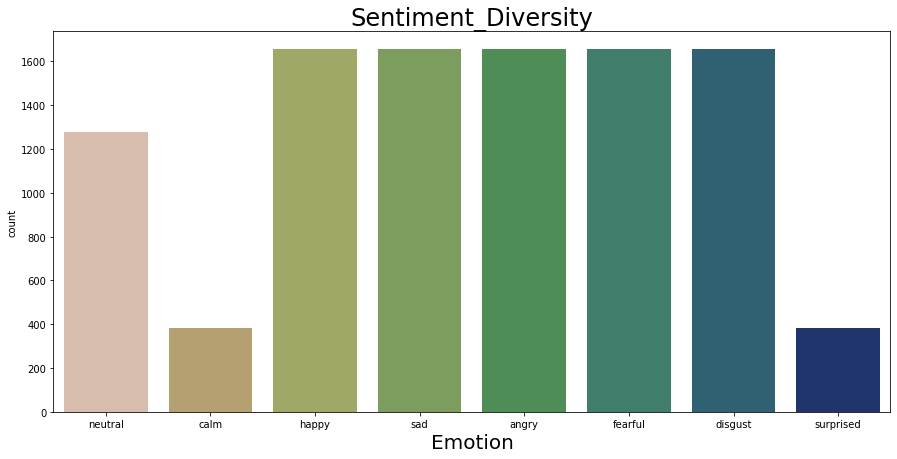

In [59]:
fig, ax = plt.subplots(figsize = ( 15 , 7 ))
sns.countplot(x="Emotion", data=Audio_df,palette='gist_earth_r')
ax.set_xlabel( "Emotion" , size = 20 )
ax.set_title( "Sentiment_Diversity" , size = 24 )

In [61]:
Audio_df.replace(to_replace ="calm",
                 value ="neutral",inplace=True)

Audio_df = Audio_df[Audio_df['Emotion'] != 'surprised']

Audio_df.head()

,Speaker,Emotion,Label,mfcc_0,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,...,chroma_9,chroma_10,chroma_11,spectral_contrast_0,spectral_contrast_1,spectral_contrast_2,spectral_contrast_3,spectral_contrast_4,spectral_contrast_5,spectral_contrast_6
0,Men,neutral,Men_neutral,-697.98420,55.228490,0.323863,12.775377,7.396147,0.866224,-3.550276,...,0.746300,0.744283,0.722983,19.170998,11.228536,14.938287,14.187339,14.899156,16.857357,29.403947
1,Men,neutral,Men_neutral,-693.06976,55.734570,-1.919739,16.408995,8.449355,0.220736,-1.738342,...,0.741526,0.739967,0.722161,19.703677,12.061533,15.659183,14.883159,15.174847,16.912811,28.869441
2,Men,neutral,Men_neutral,-691.77014,58.350647,-0.165160,13.952125,5.053323,1.489326,-2.397429,...,0.754845,0.704650,0.713902,18.818881,12.208414,14.876291,14.282521,15.448914,16.767068,29.213471
3,Men,neutral,Men_neutral,-685.23790,56.236694,2.453112,13.566656,6.701949,3.341493,-1.895052,...,0.708235,0.719849,0.735221,20.481934,11.763805,15.675734,15.455351,15.378251,16.154742,28.362977
4,Men,neutral,Men_calm,-727.31793,62.764400,2.751275,15.473256,7.763115,2.330714,-3.641682,...,0.737612,0.769464,0.702859,18.478177,11.246410,15.137288,14.289477,15.609332,16.297521,28.978391


Text(0.5, 1.0, 'Sentiment_Diversity')

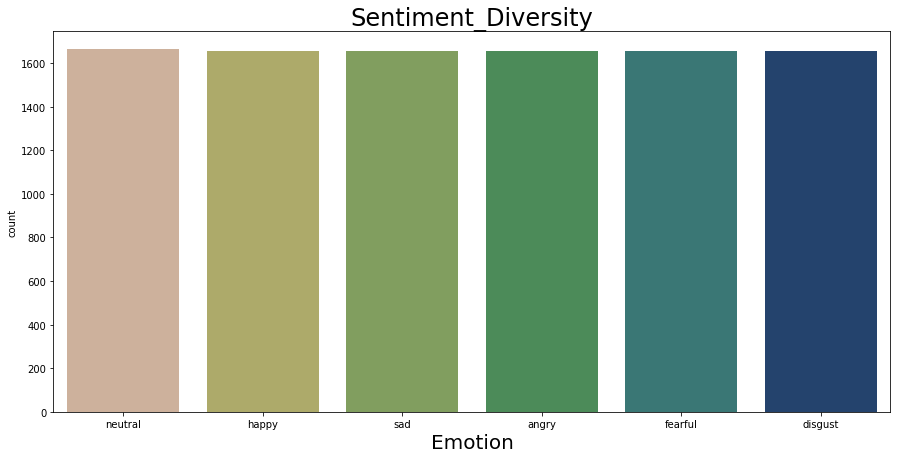

In [62]:
fig, ax = plt.subplots(figsize = ( 15 , 7 ))
sns.countplot(x="Emotion", data=Audio_df,palette='gist_earth_r')
ax.set_xlabel( "Emotion" , size = 20 )
ax.set_title( "Sentiment_Diversity" , size = 24 )

In [64]:
Audio_df.shape

(9938, 35)

In [65]:
# DUMB IN EXCEL OBJECT FOR FUTURE USE
Audio_df.to_csv('AUDIO_DF.csv')